In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 500)
pal = sns.color_palette()

In [2]:
df = pd.read_csv("C:/Users/cj.alonzo/OneDrive - Nice Systems Ltd/Documents/Personal/Data Science/personal projects/delays/merged_data_with_airlines.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20604118 entries, 0 to 20604117
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY_OF_MONTH         int64  
 3   DAY_OF_WEEK          int64  
 4   TAIL_NUM             object 
 5   OP_CARRIER_FL_NUM    int64  
 6   ORIGIN               object 
 7   ORIGIN_CITY_NAME     object 
 8   DEST                 object 
 9   DEST_CITY_NAME       object 
 10  DEP_TIME             float64
 11  DEP_DELAY            float64
 12  DEP_DEL15            float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  ARR_DEL15            float64
 16  CARRIER_DELAY        float64
 17  WEATHER_DELAY        float64
 18  NAS_DELAY            float64
 19  SECURITY_DELAY       float64
 20  LATE_AIRCRAFT_DELAY  float64
 21  AIRLINE              object 
dtypes: float64(11), int64(5), object(6)
memory usage: 3.4+ GB


In [4]:
df.isnull().sum().sort_values(ascending = False)

LATE_AIRCRAFT_DELAY    16645217
SECURITY_DELAY         16645217
NAS_DELAY              16645217
WEATHER_DELAY          16645217
CARRIER_DELAY          16645217
ARR_DEL15                444398
ARR_DELAY                444398
ARR_TIME                 399798
DEP_DELAY                384425
DEP_DEL15                384425
DEP_TIME                 384198
TAIL_NUM                  85159
YEAR                          0
MONTH                         0
DEST_CITY_NAME                0
DEST                          0
ORIGIN_CITY_NAME              0
ORIGIN                        0
OP_CARRIER_FL_NUM             0
DAY_OF_WEEK                   0
DAY_OF_MONTH                  0
AIRLINE                       0
dtype: int64

In [5]:
dataframe = [df]
columns_to_fill = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

for df in dataframe:
    df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [6]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE
0,2021,1,1,5,N131EV,4656,ATL,"Atlanta, GA",JAN,"Jackson/Vicksburg, MS",1446.0,256.0,1.0,1502.0,249.0,1.0,49.0,0.0,0.0,0.0,200.0,Endeavor Air
1,2021,1,1,5,N131EV,4656,JAN,"Jackson/Vicksburg, MS",ATL,"Atlanta, GA",1542.0,237.0,1.0,1749.0,218.0,1.0,0.0,0.0,0.0,0.0,218.0,Endeavor Air
2,2021,1,1,5,N131EV,4889,ATL,"Atlanta, GA",GSP,"Greer, SC",2044.0,14.0,0.0,2128.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air
3,2021,1,1,5,N131EV,4936,OKC,"Oklahoma City, OK",ATL,"Atlanta, GA",856.0,176.0,1.0,1301.0,238.0,1.0,0.0,176.0,62.0,0.0,0.0,Endeavor Air
4,2021,1,1,5,N132EV,4698,BHM,"Birmingham, AL",ATL,"Atlanta, GA",1500.0,-5.0,0.0,1701.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air


In [7]:
# filter delays greater than 0 minutes and less than 30 minutes
filtered_delays = df[(df['DEP_DELAY'] > 0) & (df['DEP_DELAY'] < 30)]

# group data by 'DEP_DELAY', count each unique variable, create a new column when resetting, and rename the column with the counts as Count
grouped_delay = filtered_delays.groupby('DEP_DELAY').size().reset_index().rename(columns={0: 'Count'})

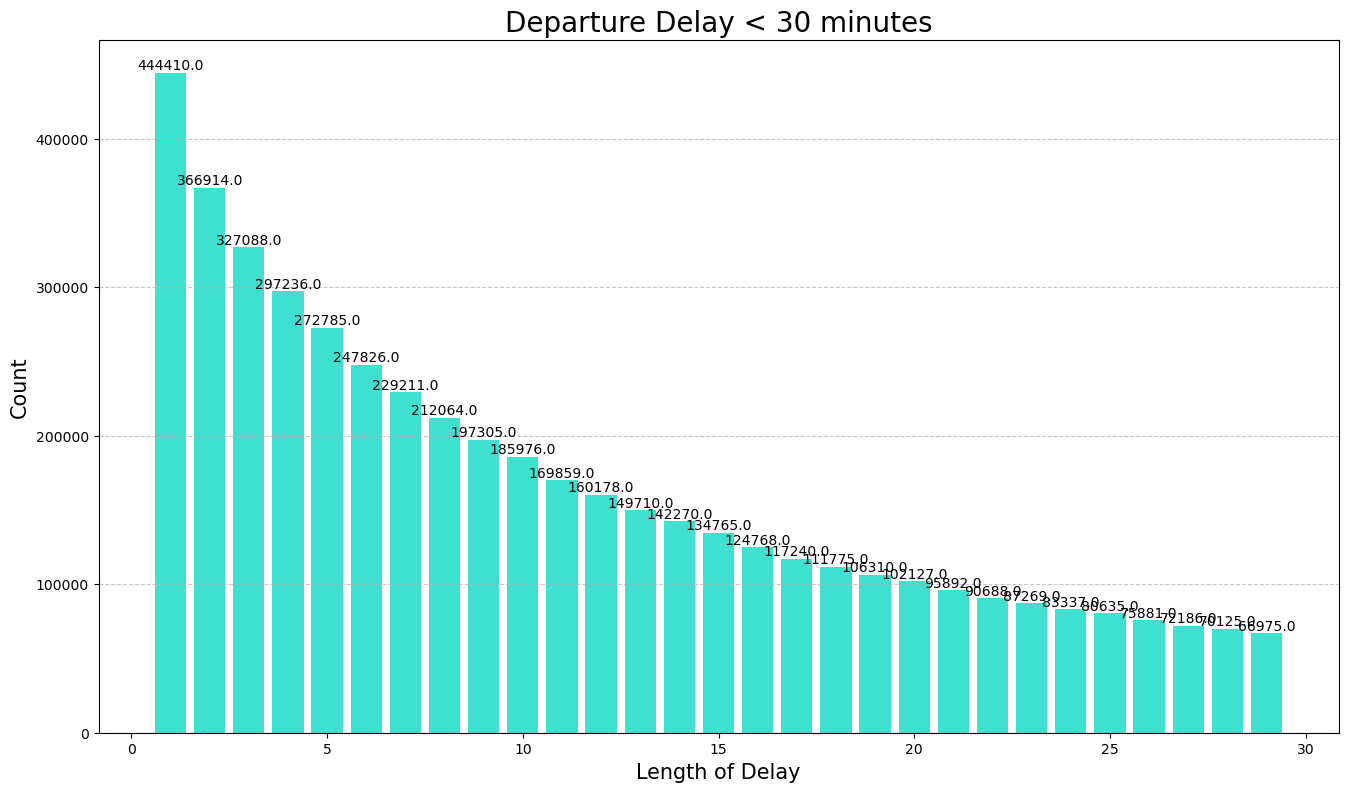

In [8]:
# bar graph
plt.figure(figsize=(16, 9))
plt.bar(data=grouped_delay, x='DEP_DELAY', height='Count', color='turquoise')

# Ttitle and axis labels
plt.title('Departure Delay < 30 minutes', fontsize=20)
plt.xlabel('Length of Delay', fontsize=15)
plt.ylabel('Count', fontsize=15)

# grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# value labels above each bar
for index, row in grouped_delay.iterrows():
    plt.text(row['DEP_DELAY'], row['Count'], str(row['Count']), ha='center', va='bottom', fontsize=10)

plt.show()

In [9]:
# new column specifying how bad the delay was
df["DelayGroup"] = None
df.loc[df["DEP_DELAY"] <= 0, "DelayGroup"] = "Early or On Time"
df.loc[(df["DEP_DELAY"] > 0) & (df["DEP_DELAY"] <= 15), "DelayGroup"] = "Small Delay"
df.loc[(df["DEP_DELAY"] > 15) & (df["DEP_DELAY"] <= 45), "DelayGroup"] = "Medium Delay"
df.loc[df["DEP_DELAY"] > 45, "DelayGroup"] = "Large Delay"

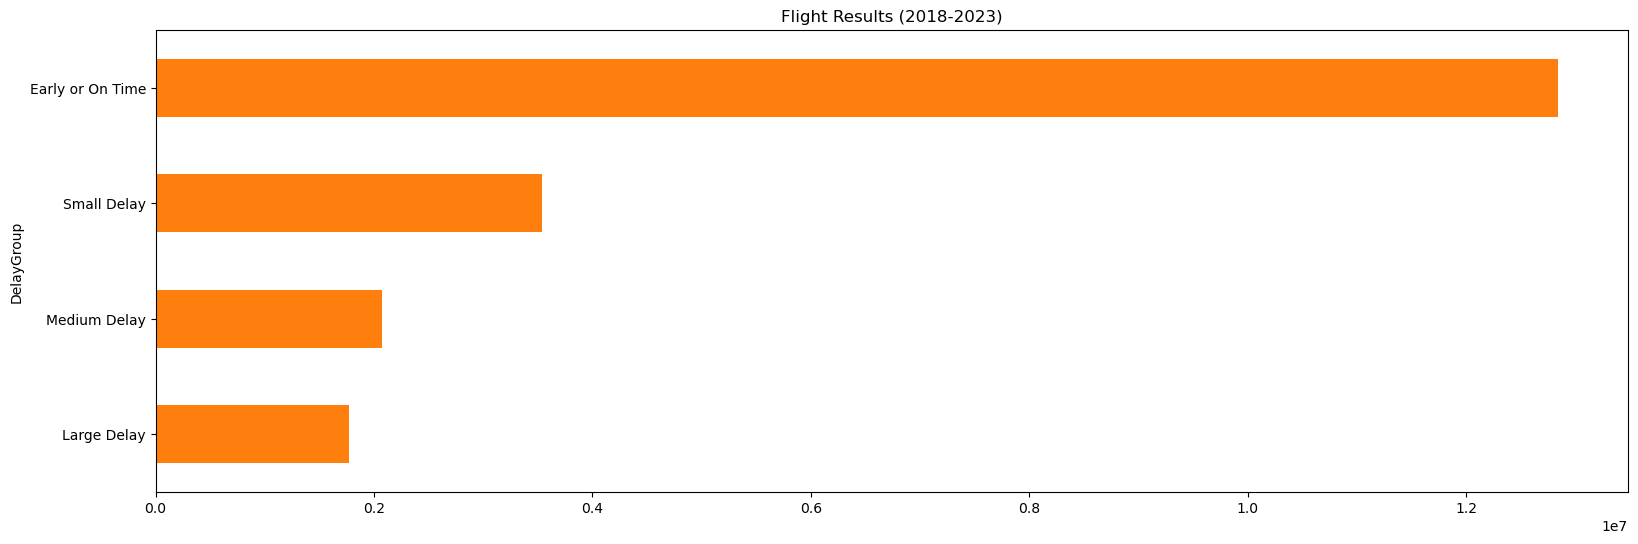

In [10]:
# most flights were early or on time
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(19, 6), color=pal[1], title="Flight Results (2018-2023)"
)
plt.show()

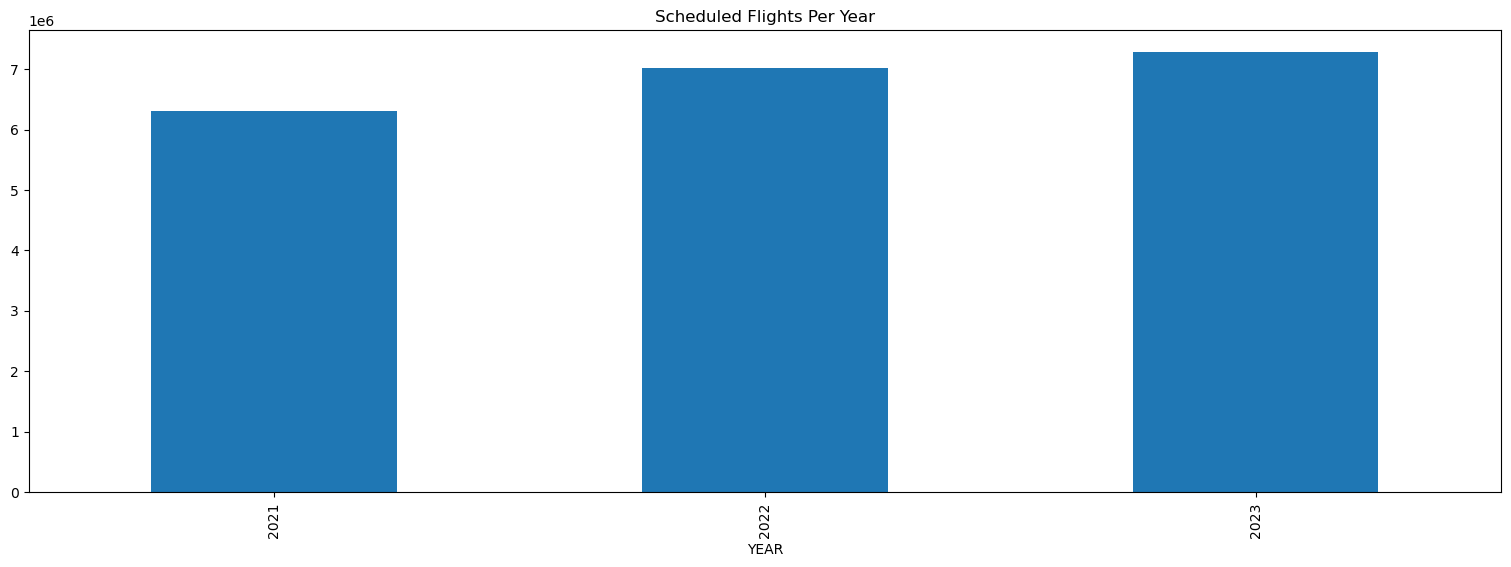

In [11]:
df["YEAR"].value_counts().sort_index().plot(
    kind="bar", figsize=(19, 6), title="Scheduled Flights Per Year"
)
plt.show()

In [12]:
df.shape

(20604118, 23)

In [13]:
df.isnull().sum().sort_values(ascending=False)*100/20604118

ARR_DEL15              2.156841
ARR_DELAY              2.156841
ARR_TIME               1.940379
DEP_DELAY              1.865768
DEP_DEL15              1.865768
DelayGroup             1.865768
DEP_TIME               1.864666
TAIL_NUM               0.413311
ORIGIN                 0.000000
CARRIER_DELAY          0.000000
AIRLINE                0.000000
LATE_AIRCRAFT_DELAY    0.000000
SECURITY_DELAY         0.000000
NAS_DELAY              0.000000
WEATHER_DELAY          0.000000
DAY_OF_WEEK            0.000000
DAY_OF_MONTH           0.000000
ORIGIN_CITY_NAME       0.000000
OP_CARRIER_FL_NUM      0.000000
MONTH                  0.000000
DEST_CITY_NAME         0.000000
DEST                   0.000000
YEAR                   0.000000
dtype: float64

In [14]:
#no dep_delay bc they were cancelled?
cancelled_flights = df[df['DelayGroup'] == 'Cancelled']

In [15]:
#most cancelled in march and april. makes sense.
df_month = df.groupby("MONTH")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay"]
df_month[col_order].style.background_gradient(cmap="Blues")

DelayGroup,Early or On Time,Small Delay,Medium Delay,Large Delay
MONTH,,,,
1,68.438291,14.790033,8.696980,8.074696
2,67.101523,16.201303,9.156436,7.540738
3,65.254168,16.934854,9.828989,7.981990
4,64.999782,16.854302,9.794470,8.351447
5,64.971529,17.798739,9.594500,7.635231
6,56.592495,19.056340,12.451192,11.899973
7,56.040814,18.858037,12.545922,12.555228
8,60.432008,17.758206,11.327724,10.482061
9,67.486148,16.522137,8.890350,7.101365


In [16]:
# reset Description categories
df["AIRLINE"] = df["AIRLINE"].astype("str").astype("category")

# count each instance of airline
airline_counts = df["AIRLINE"].value_counts()

print('Total Airline Flights \n', airline_counts, '\n')

Total Airline Flights 
 AIRLINE
Southwest Airlines Co.                     3810254
Delta Air Lines                            2626156
American Airlines                          2551075
SkyWest Airlines                           2162222
United Air Lines                           1805522
Republic Airline                            945199
JetBlue Airways                             750612
Envoy Air                                   731268
Endeavor Air                                700418
Spirit Air Lines                            687632
Alaska Airlines                             662683
PSA Airlines                                631209
Frontier Airlines                           470166
Mesa Airlines                               363221
Allegiant Air                               348297
Piedmont Airlines                           284019
Horizon Air                                 269018
CommuteAir LLC dba CommuteAir               225395
Hawaiian Airlines                           215374

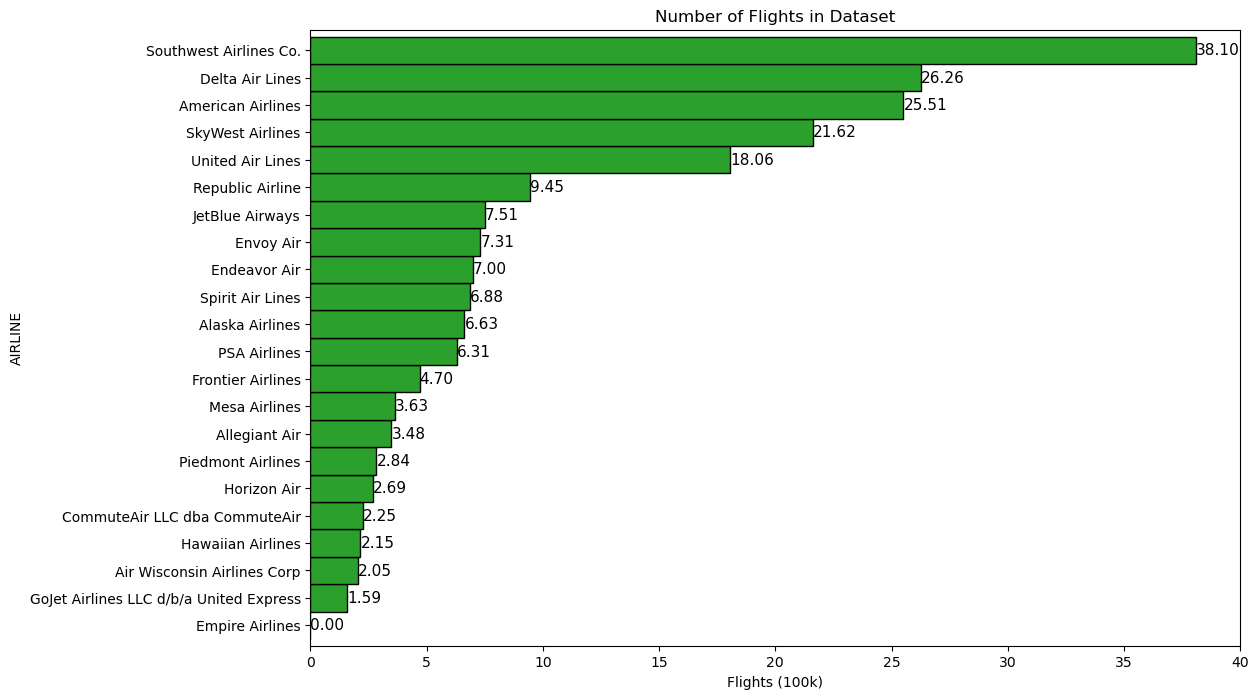

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

# horizontal bar plot
airlines_ordered = (df["AIRLINE"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)

# count labels next to each bar
for bar in airlines_ordered.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.2f}',
             va='center', ha='left', fontsize=11)

ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")
plt.show()

In [18]:
# group airline and delay group, calculate the normalized counts
df_agg = (
    df.groupby(["AIRLINE", "DelayGroup"])
    .size()
    .unstack()
    .fillna(0)
    .apply(lambda x: x / x.sum(), axis=1)
)

# count instances of each airline
airline_counts = df["AIRLINE"].value_counts()

# filter airlines with at least 210000 flights
filtered_airlines = airline_counts[airline_counts >= 210000].index

# filter DataFrame based on selected airlines
df_filtered = df[df["AIRLINE"].isin(filtered_airlines)]

In [19]:
delay_mapping = {
    "Early or On Time": "Good",
    "Small Delay": "Good",
    "Medium Delay": "Bad",
    "Large Delay": "Bad",
}

In [20]:
df_filtered["DelayOk"] = df_filtered["DelayGroup"].map(delay_mapping)

C:\Users\cj.alonzo\AppData\Local\Temp\ipykernel_7552\1682589706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["DelayOk"] = df_filtered["DelayGroup"].map(delay_mapping)


In [21]:
df_filtered.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE,DelayGroup,DelayOk
0,2021,1,1,5,N131EV,4656,ATL,"Atlanta, GA",JAN,"Jackson/Vicksburg, MS",1446.0,256.0,1.0,1502.0,249.0,1.0,49.0,0.0,0.0,0.0,200.0,Endeavor Air,Large Delay,Bad
1,2021,1,1,5,N131EV,4656,JAN,"Jackson/Vicksburg, MS",ATL,"Atlanta, GA",1542.0,237.0,1.0,1749.0,218.0,1.0,0.0,0.0,0.0,0.0,218.0,Endeavor Air,Large Delay,Bad
2,2021,1,1,5,N131EV,4889,ATL,"Atlanta, GA",GSP,"Greer, SC",2044.0,14.0,0.0,2128.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Small Delay,Good
3,2021,1,1,5,N131EV,4936,OKC,"Oklahoma City, OK",ATL,"Atlanta, GA",856.0,176.0,1.0,1301.0,238.0,1.0,0.0,176.0,62.0,0.0,0.0,Endeavor Air,Large Delay,Bad
4,2021,1,1,5,N132EV,4698,BHM,"Birmingham, AL",ATL,"Atlanta, GA",1500.0,-5.0,0.0,1701.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,Endeavor Air,Early or On Time,Good


In [22]:
# group by airline and delay group, calculate the normalized counts again
df_agg = (
    df_filtered.groupby(["AIRLINE", "DelayGroup"])
    .size()
    .unstack()
    .fillna(0)
    .apply(lambda x: x / x.sum(), axis=1)
)

# sort the airlines based on total flights
df_agg_sorted = df_agg.loc[airline_counts.loc[filtered_airlines].sort_values(ascending=True).index]

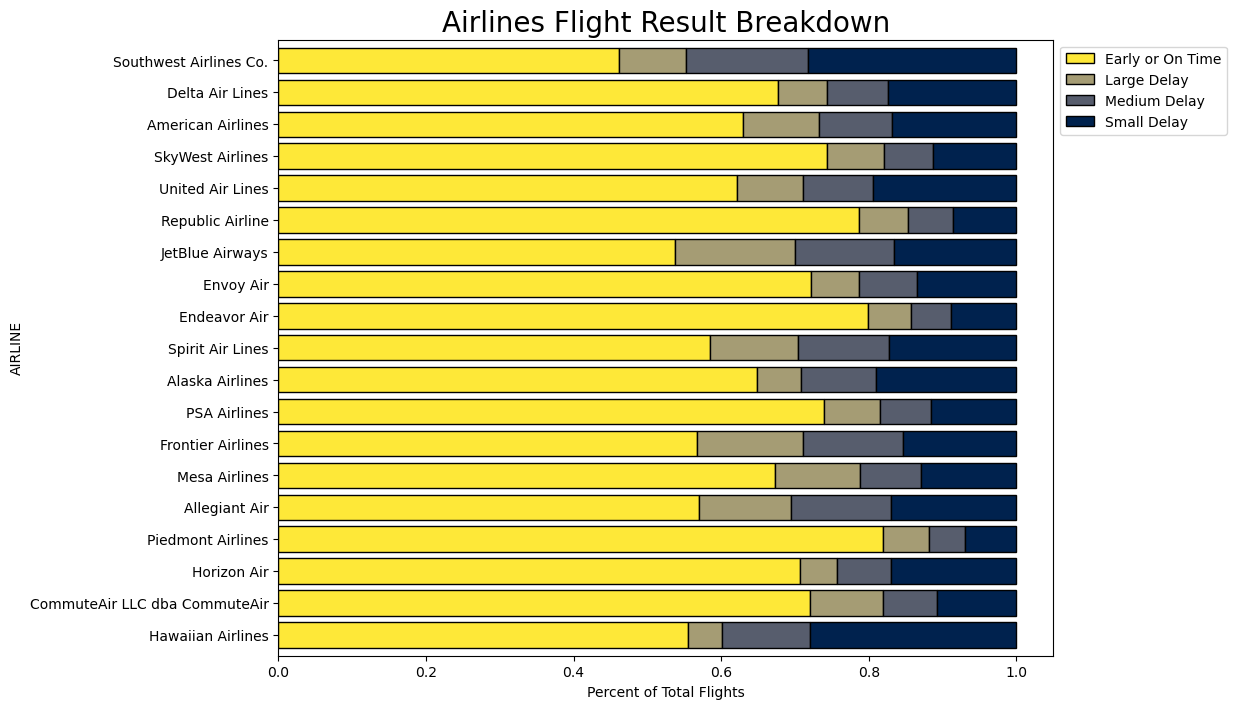

In [23]:
# choose a colormap (e.g., 'viridis')
cmap = plt.get_cmap('cividis_r')

# stacked bar plot with colormap
fig, ax = plt.subplots(figsize=(10, 8))
df_agg_sorted.plot(kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black", colormap=cmap)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [24]:
# group by airline and delay group, calculate the normalized counts again
df_agg = (
    df_filtered.groupby(["AIRLINE"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

# count instances of each airline
airline_counts = df_filtered["AIRLINE"].value_counts()

# sort the airlines based on the most "Good" delays
df_agg_sorted = df_agg.loc[filtered_airlines].sort_values(by="Good", ascending=False)

# display the sorted DataFrame
print(df_agg_sorted)

DelayOk                            Good       Bad
AIRLINE                                          
JetBlue Airways                0.703275  0.296725
Frontier Airlines              0.720112  0.279888
Allegiant Air                  0.739579  0.260421
Southwest Airlines Co.         0.744038  0.255962
Spirit Air Lines               0.757199  0.242801
American Airlines              0.797992  0.202008
Mesa Airlines                  0.801682  0.198318
United Air Lines               0.815033  0.184967
CommuteAir LLC dba CommuteAir  0.827683  0.172317
Hawaiian Airlines              0.835256  0.164744
Alaska Airlines                0.837737  0.162263
Delta Air Lines                0.851519  0.148481
PSA Airlines                   0.854786  0.145214
Envoy Air                      0.855913  0.144087
SkyWest Airlines               0.856294  0.143706
Republic Airline               0.872786  0.127214
Horizon Air                    0.875716  0.124284
Endeavor Air                   0.887110  0.112890


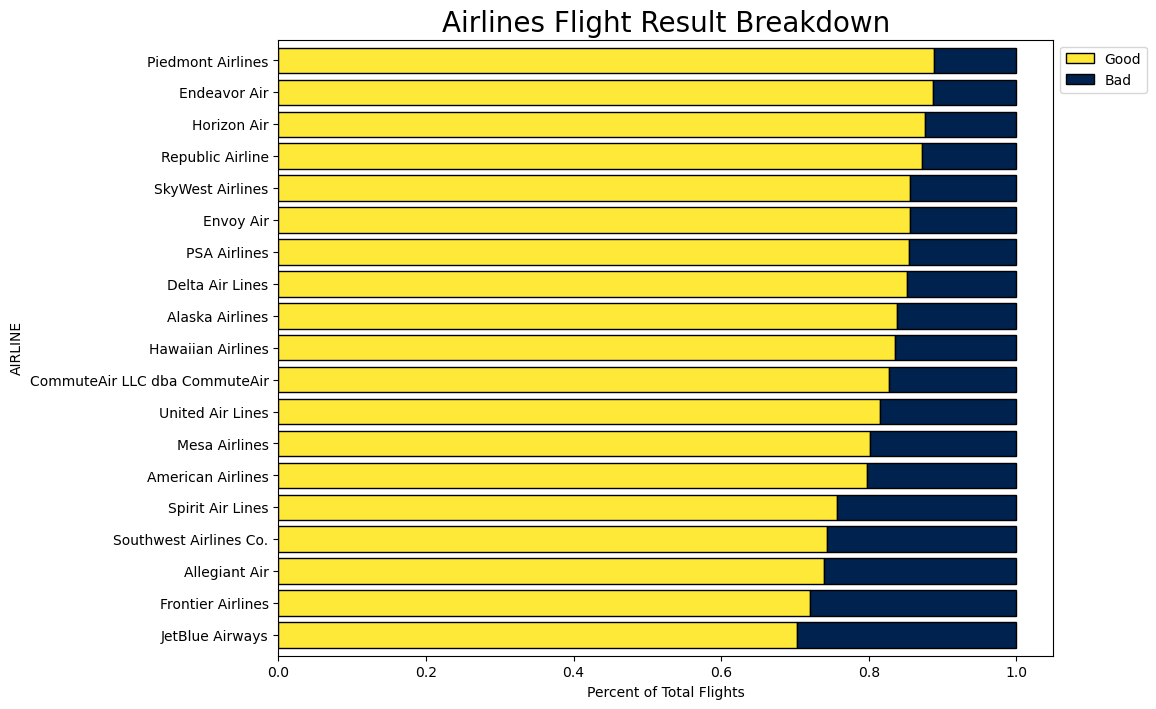

In [26]:
# stacked bar plot
fig, ax = plt.subplots(figsize=(10, 8))
df_agg_sorted.plot(kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black", colormap=cmap)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [27]:
# function that extracts statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [28]:
delay_mapping = {
    "Early or On Time": "Good",
    "Small Delay": "Good",
    "Medium Delay": "Bad",
    "Large Delay": "Bad"
}

In [29]:
df["DelayOk"] = df["DelayGroup"].map(delay_mapping)

In [30]:
# create a dataframe with stats on each airline based on delay
global_stats = df['DEP_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean', ascending = False)
global_stats

,min,max,count,mean
AIRLINE,,,,
JetBlue Airways,-73.0,2508.0,731946.0,21.880971
Frontier Airlines,-59.0,1393.0,460387.0,18.740892
Mesa Airlines,-35.0,2186.0,353210.0,16.850769
Allegiant Air,-45.0,2065.0,339665.0,16.372099
Spirit Air Lines,-52.0,1587.0,670834.0,15.541027
American Airlines,-47.0,4413.0,2500286.0,14.945120
Southwest Airlines Co.,-52.0,975.0,3730507.0,13.097314
CommuteAir LLC dba CommuteAir,-34.0,1488.0,220089.0,12.825366
Air Wisconsin Airlines Corp,-43.0,1498.0,199922.0,12.530072


C:\Users\cj.alonzo\AppData\Local\Temp\ipykernel_7552\40310822.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax3 = sns.stripplot(y="AIRLINE", x="DEP_DELAY", size=4, palette=colors,
C:\Users\cj.alonzo\AppData\Local\Temp\ipykernel_7552\40310822.py:6: UserWarning: The palette list has more values (28) than needed (22), which may not be intended.
  ax3 = sns.stripplot(y="AIRLINE", x="DEP_DELAY", size=4, palette=colors,


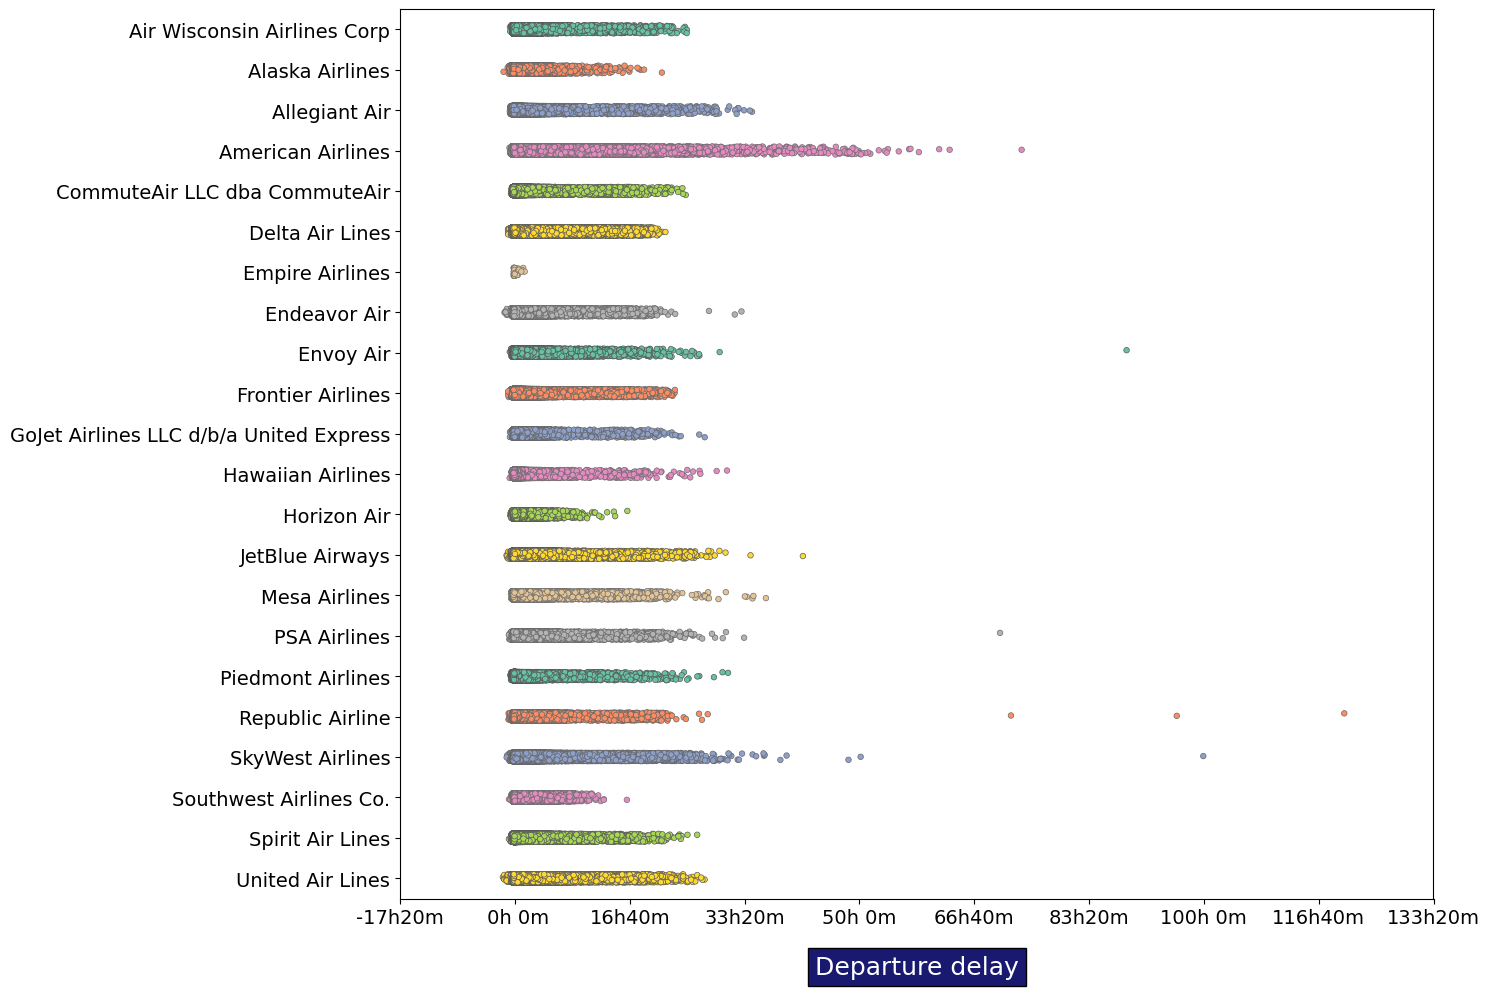

In [31]:
# striplot
colors = sns.color_palette("Set2", n_colors=28)

plt.figure(figsize=(15, 10))

ax3 = sns.stripplot(y="AIRLINE", x="DEP_DELAY", size=4, palette=colors,
                    data=df, linewidth=0.5, jitter=True)

plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*divmod(x, 60)) for x in ax3.get_xticks()],
                    fontsize=14)

plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor': 'midnightblue', 'pad': 5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)
plt.show()

In [32]:
print("Number of airports: {}".format(len(df['ORIGIN'].unique())))

Number of airports: 380


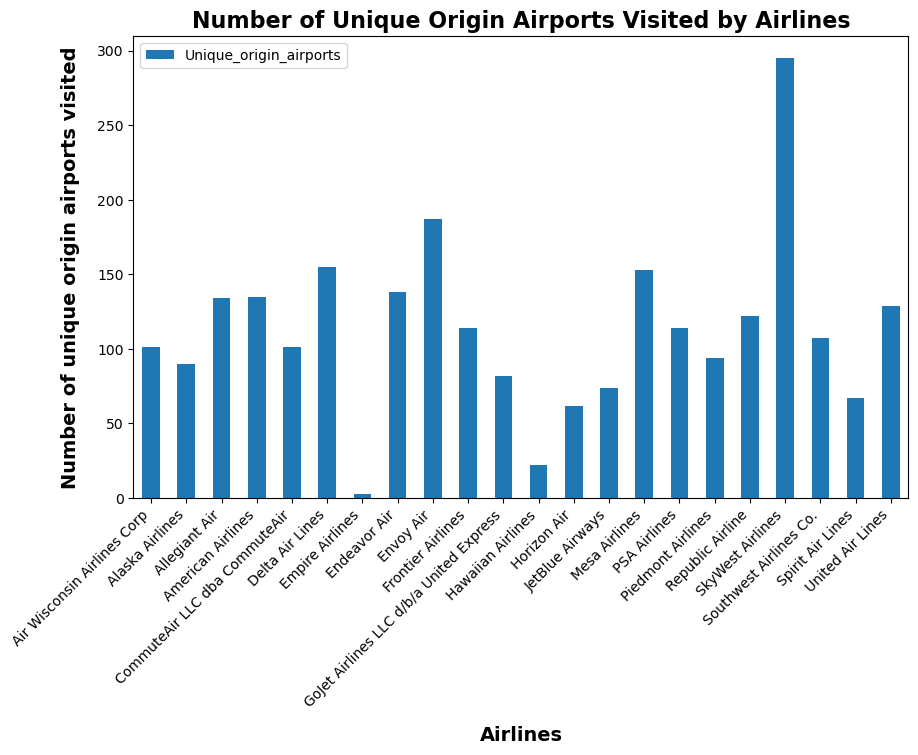

In [33]:
# count the number of unique origin airports visited per airline
unique_origin_airports = df.groupby('AIRLINE')['ORIGIN'].nunique().reset_index()

# rename the column for clarity
unique_origin_airports.rename(columns={'ORIGIN': 'Unique_origin_airports'}, inplace=True)

# plot the bar chart
ax = unique_origin_airports.set_index('AIRLINE').plot(kind='bar', figsize=(10, 6))

# set labels and title
plt.ylabel('Number of unique origin airports visited', fontsize=14, weight='bold', labelpad=12)
plt.xlabel('Airlines', fontsize=14, weight='bold', labelpad=12)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Unique Origin Airports Visited by Airlines', fontsize=16, weight='bold')

plt.show()

In [34]:
# define a function to calculate statistics
def get_stats(x):
    return pd.Series({
        'min': x.min(),
        'max': x.max(),
        'count': x.count(),
        'mean': x.mean()
    })

# calculate statistics for mean delays per airport
airport_stats = df['DEP_DELAY'].groupby(df['ORIGIN_CITY_NAME']).apply(get_stats).unstack()

# sort the statistics by count in descending order
airport_stats = airport_stats.sort_values('mean', ascending=False)

print(airport_stats)

                   min     max   count       mean
ORIGIN_CITY_NAME                                 
Pago Pago, TT    -31.0  1551.0   202.0  44.920792
Bishop, CA       -23.0  1207.0   592.0  32.369932
Santa Maria, CA  -30.0  1332.0   548.0  25.941606
Stockton, CA     -30.0  1393.0  1777.0  25.157569
Aguadilla, PR    -40.0  1387.0  6701.0  24.970004
...                ...     ...     ...        ...
Nome, AK         -38.0   438.0  1943.0  -2.794647
Kotzebue, AK     -99.0   264.0  1929.0  -3.046656
Saipan, TT       -41.0   664.0  1041.0  -5.826129
Gustavus, AK     -39.0   119.0   268.0  -6.671642
Deadhorse, AK    -45.0   434.0  1249.0  -7.290633

[374 rows x 4 columns]
